In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
df=pd.read_csv(r"E:\Datasets\Play Store Data.csv")

In [3]:
df.shape

(10841, 13)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# Data Cleaning

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
df=df.dropna()
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
df.duplicated().sum()

474

In [14]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [15]:
# Finding the average ratings

In [16]:
print(df['Rating'])

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
8881    4.0
8882    4.5
8883    5.0
8884    4.5
8885    4.5
Name: Rating, Length: 8886, dtype: float64


In [17]:
s=0
for i in df['Rating']:
    s+=i
s=int(s)
a=s/len(df['Rating'])
print("The average ratings of datas in our dataset is",round(a,2))

The average ratings of datas in our dataset is 4.19


In [18]:
# How many apps have rating 5

In [19]:
c=0
for i in df['Rating']:
    if (i==5.0):
        c+=1
print(f"There are {c} apps with rating 5")

There are 271 apps with rating 5


In [20]:
# Apps with ratings between the range of 4 and 4.5

In [21]:
a=0
for i in df['Rating']:
    if (i>=4 and i<=4.5):
        a+=1
print(f"There are {a} apps with ratings between 4 and 4.5")

There are 5104 apps with ratings between 4 and 4.5


In [22]:
# Distribution of apps according their ratings

In [23]:
avg_app_rating=round(df['Rating'].mean(),2)
data=[go.Histogram(
          x=df['Rating'],
          xbins={'start':1, 'size':0.1,'end':5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

In [24]:
# Total number of unique categories

In [25]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
n=df['Category'].nunique()
print("There are total of",n,"unique values in category column")

There are total of 33 unique values in category column


In [27]:
# Total number of apps in HEALTH_AND_FITNESS category

In [28]:
h=0
for i in df['Category']:
    if (i=='HEALTH_AND_FITNESS'):
        h+=1
print(f"There are total {h} number of apps in health and fitness category")

There are total 262 number of apps in health and fitness category


In [29]:
# Finding Total number of apps in each category

In [30]:
categories={}

for name in df['Category'].unique():
    ct=0
    for i in df['Category']:
        if (i==name):
            ct+=1
    categories[name] = ct

In [31]:
categories

{'ART_AND_DESIGN': 61,
 'AUTO_AND_VEHICLES': 73,
 'BEAUTY': 42,
 'BOOKS_AND_REFERENCE': 177,
 'BUSINESS': 270,
 'COMICS': 58,
 'COMMUNICATION': 307,
 'DATING': 159,
 'EDUCATION': 129,
 'ENTERTAINMENT': 111,
 'EVENTS': 45,
 'FINANCE': 317,
 'FOOD_AND_DRINK': 106,
 'HEALTH_AND_FITNESS': 262,
 'HOUSE_AND_HOME': 68,
 'LIBRARIES_AND_DEMO': 64,
 'LIFESTYLE': 305,
 'GAME': 1074,
 'FAMILY': 1717,
 'MEDICAL': 302,
 'SOCIAL': 244,
 'SHOPPING': 202,
 'PHOTOGRAPHY': 304,
 'SPORTS': 286,
 'TRAVEL_AND_LOCAL': 205,
 'TOOLS': 733,
 'PERSONALIZATION': 308,
 'PRODUCTIVITY': 334,
 'PARENTING': 50,
 'WEATHER': 75,
 'VIDEO_PLAYERS': 160,
 'NEWS_AND_MAGAZINES': 214,
 'MAPS_AND_NAVIGATION': 124}

In [32]:
for i in df['Category'].unique():
    print(i,":",categories[i])

ART_AND_DESIGN : 61
AUTO_AND_VEHICLES : 73
BEAUTY : 42
BOOKS_AND_REFERENCE : 177
BUSINESS : 270
COMICS : 58
COMMUNICATION : 307
DATING : 159
EDUCATION : 129
ENTERTAINMENT : 111
EVENTS : 45
FINANCE : 317
FOOD_AND_DRINK : 106
HEALTH_AND_FITNESS : 262
HOUSE_AND_HOME : 68
LIBRARIES_AND_DEMO : 64
LIFESTYLE : 305
GAME : 1074
FAMILY : 1717
MEDICAL : 302
SOCIAL : 244
SHOPPING : 202
PHOTOGRAPHY : 304
SPORTS : 286
TRAVEL_AND_LOCAL : 205
TOOLS : 733
PERSONALIZATION : 308
PRODUCTIVITY : 334
PARENTING : 50
WEATHER : 75
VIDEO_PLAYERS : 160
NEWS_AND_MAGAZINES : 214
MAPS_AND_NAVIGATION : 124


In [33]:
num_of_apps_in_category=df['Category'].value_counts().sort_values(ascending=
                                                                  False)

In [34]:
num_of_apps_in_category

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [35]:
x=num_of_apps_in_category.head(10).index
y=num_of_apps_in_category.head(10).values
data=[go.Bar(x=num_of_apps_in_category.head(10).index,
          y=num_of_apps_in_category.head(10).values)]
plotly.offline.iplot(data)

In [36]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [37]:
# Total number of free and paid apps

In [38]:
f=0
p=0
for i in df['Type']:
    if (i=='Free'):
        f+=1
for i in df['Type']:
    if (i=='Paid'):
        p+=1
print(f"There are total of {f} free and {p} paid apps are available in dataset")

There are total of 8275 free and 611 paid apps are available in dataset


In [39]:
# Percentage of free and paid apps

In [40]:
ff=round((f/len(df['Type'])*100),2)
pp=round((100-ff),2)
print(f"A total of {ff}% apps are free and {pp}% apps are paid ")

A total of 93.12% apps are free and 6.88% apps are paid 


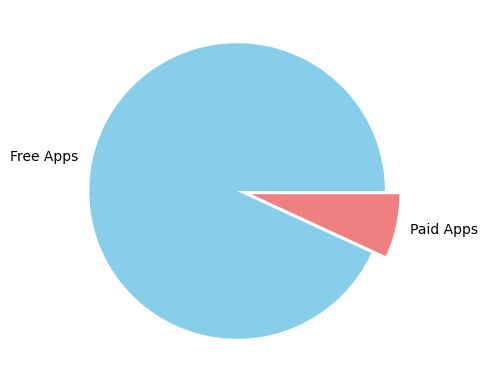

In [41]:
# Data for plotting
labels=['Free Apps','Paid Apps']
sizes=[ff,pp]
colors=['skyblue','lightcoral']
explode=[0.1,0]

# plotting the pie chart
plt.pie(sizes,labels=labels,colors=colors,explode=explode)
plt.show()

In [42]:
# Name all the content rating

In [43]:
for i in df['Content Rating'].unique():
    print(i)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [44]:
# Total number of apps in each content rating

In [45]:
content_rating={}
for name in df['Content Rating'].unique():
    ct=0
    for i in df['Content Rating']:
        if (i==name):
            ct+=1
    content_rating[name]= ct

In [46]:
for i in df['Content Rating'].unique():
    print(i,":",content_rating[i])

Everyone : 7089
Teen : 1022
Everyone 10+ : 360
Mature 17+ : 411
Adults only 18+ : 3
Unrated : 1


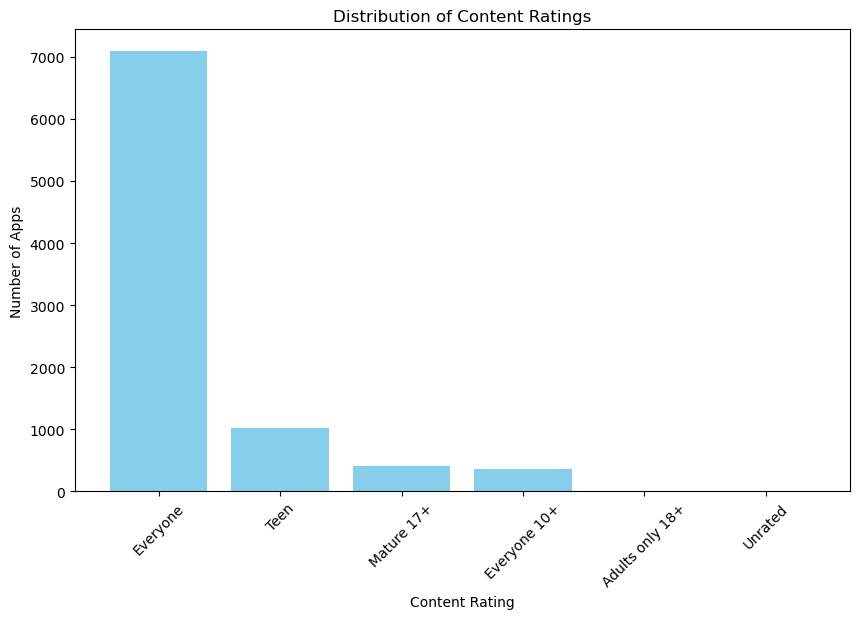

In [47]:
# Calculate the content rating counts
x=df['Content Rating'].value_counts().index
y=df['Content Rating'].value_counts().values

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [48]:
# Relationship between app size and category 

In [49]:
df['Size'].value_counts()

Varies with device    1468
14M                    153
13M                    152
12M                    151
15M                    149
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [50]:
# Convert size data into MB
def convert_size(size):
    if size[-1] == 'k':
        return float(size[:-1]) / 1024  # Convert KB to MB
    elif size[-1] == 'M':
        return float(size[:-1])  # Size is already in MB
    else:
        return np.nan  # Handle any unexpected cases

In [51]:
# Apply the conversion function to the Size column
df['Size_MB'] = df['Size'].apply(convert_size)


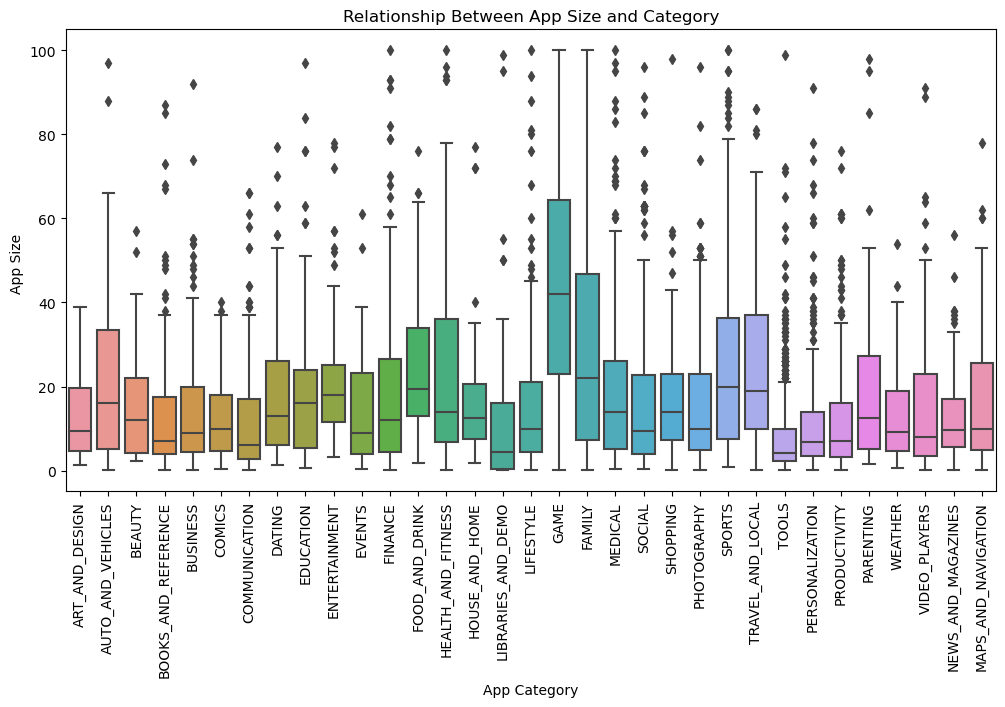

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size_MB', data=df)
plt.xlabel('App Category')
plt.ylabel('App Size ')
plt.title('Relationship Between App Size and Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [53]:
# Relationship between price and category of apps

In [54]:
df['Price'].value_counts()

0          8275
$2.99       110
$0.99       104
$4.99        68
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$33.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [55]:
# Function to clean and convert price to numeric
def clean_price(price):
    # Remove any currency symbols and commas
    price = price.replace('$', '').replace('€', '').replace('£', '').replace(','
                                                                        , '')
    # Convert to float
    return float(price)

In [56]:
# Apply the function to the Price column
df['Price_Numeric'] = df['Price'].apply(clean_price)

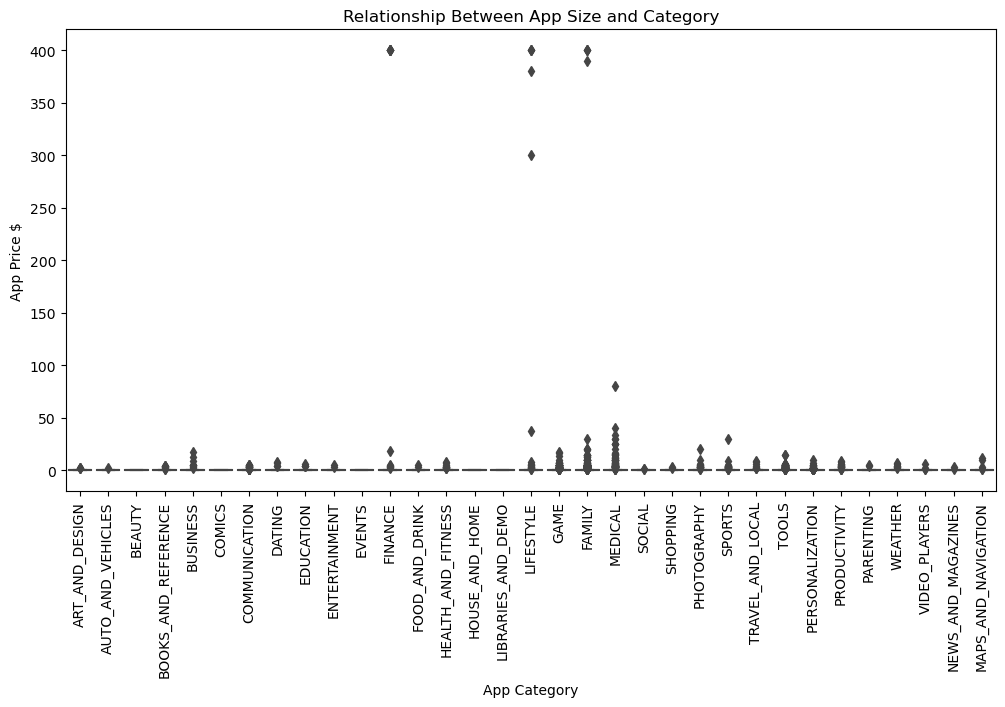

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price_Numeric', data=df)
plt.xlabel('App Category')
plt.ylabel('App Price $')
plt.title('Relationship Between App Size and Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [58]:
# Relationship between app size and price

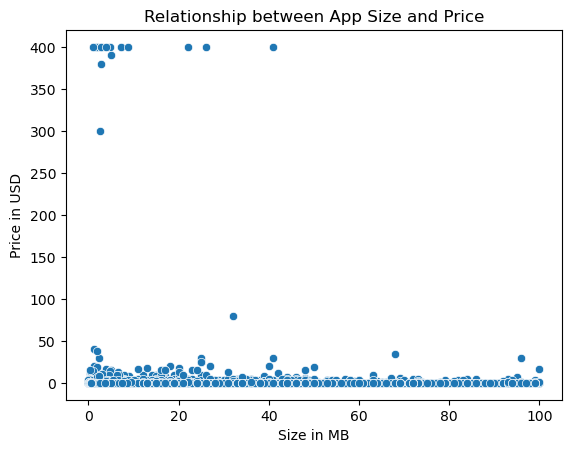

In [59]:
sns.scatterplot(x='Size_MB',y='Price_Numeric',data=df)
plt.title('Relationship between App Size and Price')
plt.xlabel('Size in MB')
plt.ylabel('Price in USD')
plt.show()

In [60]:
# Yearly update frequency of applications

In [61]:
df['Last Updated'].value_counts()

August 3, 2018      291
July 31, 2018       254
August 2, 2018      250
August 1, 2018      247
July 30, 2018       183
                   ... 
April 17, 2014        1
April 11, 2016        1
October 27, 2015      1
August 31, 2015       1
March 23, 2014        1
Name: Last Updated, Length: 1299, dtype: int64

In [62]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [63]:
df['Year']=df['Last Updated'].dt.year

In [64]:
df['Year'].value_counts()

2018    6095
2017    1457
2016     638
2015     383
2014     185
2013      91
2012      21
2011      15
2010       1
Name: Year, dtype: int64

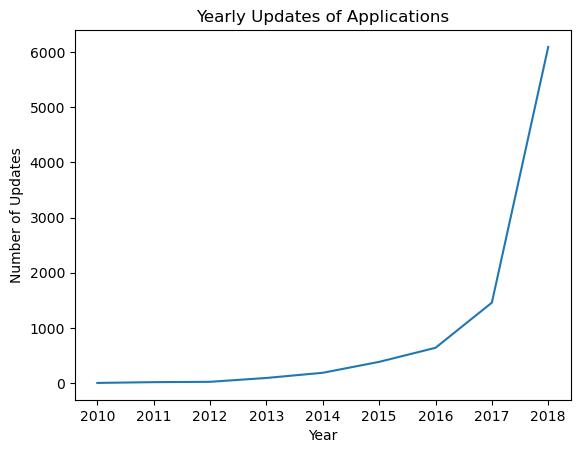

In [65]:
x=df['Year'].value_counts().index
y=df['Year'].value_counts().values
plt.plot(x,y)
plt.title('Yearly Updates of Applications')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.show()